## Cargar la información del dataset

In [5]:
import pandas as pd
df = pd.read_csv('heart_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Gráficas de los datos

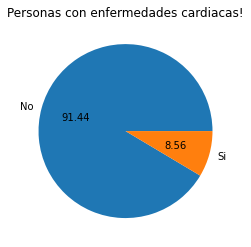

In [19]:
import matplotlib.pyplot as plt

x = [df['HeartDisease'][df['HeartDisease'] == 'No'].count(),
      df['HeartDisease'][df['HeartDisease'] == 'Yes'].count()]

plt.title('Personas con enfermedades cardiacas')
plt.pie(x,labels=['No','Si'],autopct='%.2f')
plt.show()



## Tratamiento de la información

## Definición del modelo matemático

## Entrenamiento

## Predicción

## Guardar el modelo matemático